# Loading Dataset + Basic EDA

In [69]:
import numpy as np
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
df.shape

(200, 5)

In [71]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [72]:
# Check for duplicated values
df.duplicated().sum()

np.int64(0)

# Data preprocessing + Visulization

<Axes: xlabel='Age', ylabel='Density'>

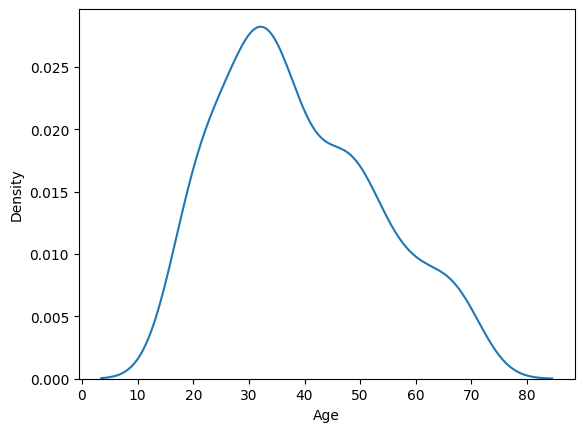

In [73]:
# Density plot of Age
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

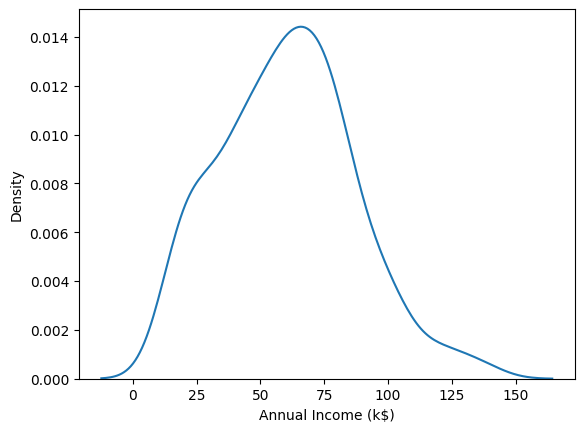

In [74]:
# Desnity plot of Annual Income
sns.kdeplot(df['Annual Income (k$)'])

<Axes: xlabel='Age'>

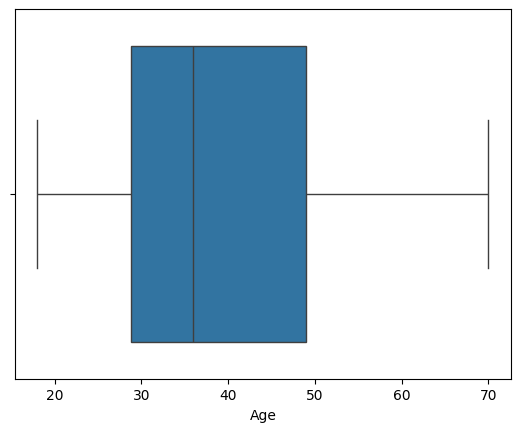

In [75]:
# Boxplot of Age
sns.boxplot(x=df['Age'])

<Axes: xlabel='Annual Income (k$)'>

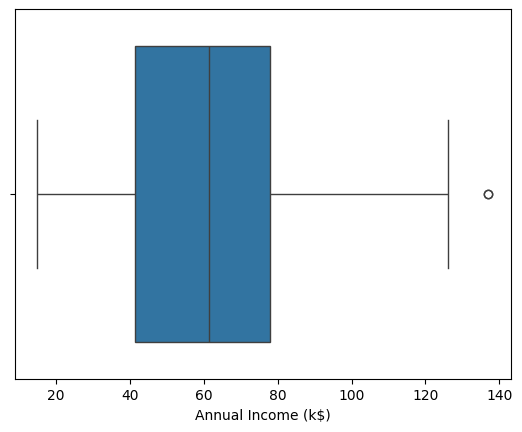

In [76]:
# boxplot of Annual income
sns.boxplot(x=df['Annual Income (k$)'])

In [77]:
# Handing that one outlier in annual income using iqr method
q1, q3 = df['Annual Income (k$)'].quantile([0.25, 0.75])
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
df['Annual Income (k$)'] = df['Annual Income (k$)'].clip(lower, upper)

<Axes: xlabel='Annual Income (k$)'>

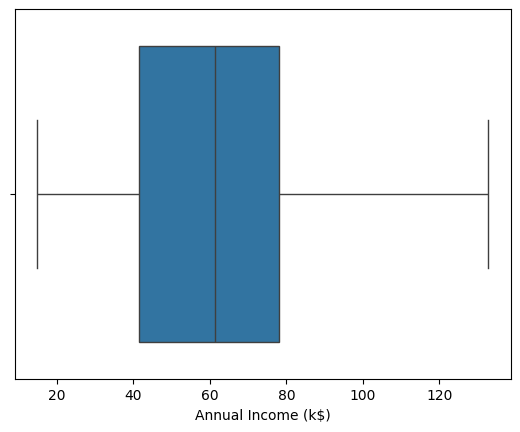

In [78]:
# checking boxplot of annual income again for no outliers
sns.boxplot(x=df['Annual Income (k$)'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

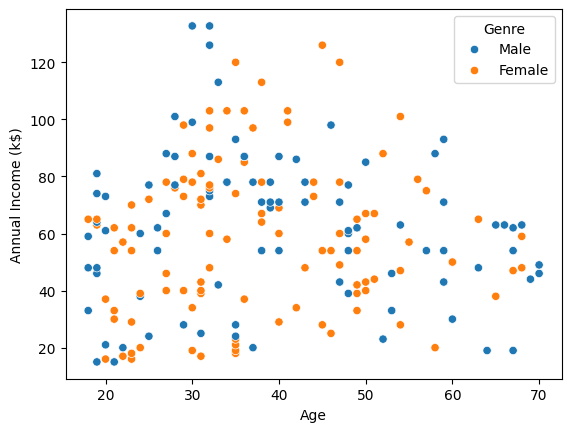

In [79]:
# Age vs Annual income scatterplot
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Genre'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

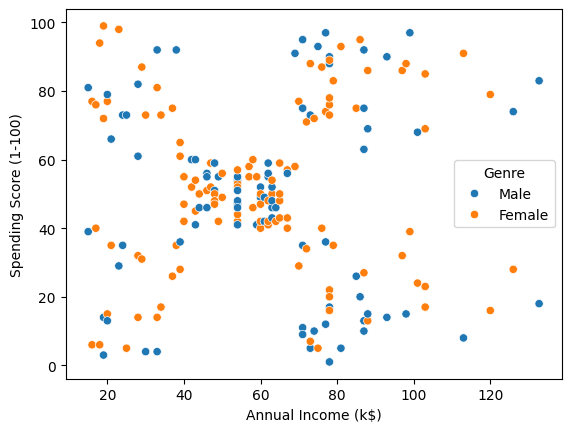

In [80]:
# Annual income vs spending score scatterplot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Genre'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

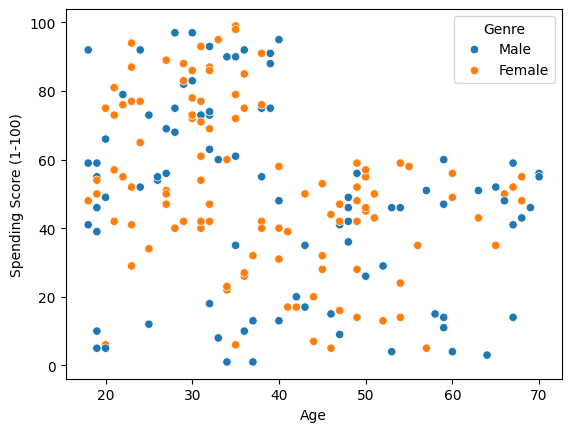

In [82]:
# Age vs spending score scatterplot
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Genre'])

In [83]:
# Dropping columns not usefull for clustering
df = df.drop(['CustomerID', 'Genre'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.0,39
1,21,15.0,81
2,20,16.0,6
3,23,16.0,77
4,31,17.0,40


In [84]:
# Scaling the numerical values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.745429,-0.434801
1,-1.281035,-1.745429,1.195704
2,-1.352802,-1.707083,-1.715913
3,-1.137502,-1.707083,1.040418
4,-0.563369,-1.668737,-0.395980


# Applying various clustering algorithms

## Applying kmeans (Optimal for given dataset)

Text(0, 0.5, 'SSE')

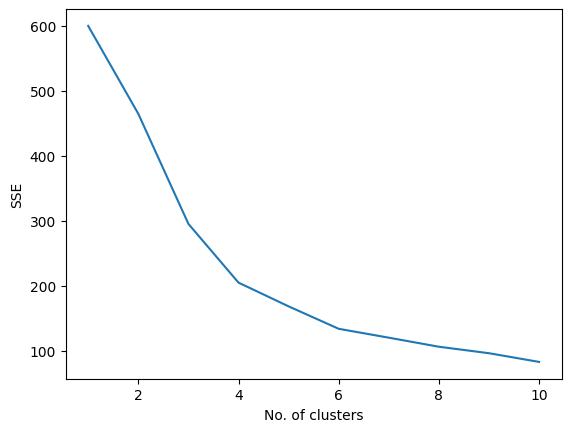

In [85]:
# Elbow method for finding optimal clusters
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
  km = KMeans(n_clusters=k, init="k-means++")
  km.fit(df)
  sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('No. of clusters')
plt.ylabel('SSE')

In [86]:
# Fitting kmeans for n_clusters=5
km = KMeans(n_clusters=5, init="k-means++")
y_pred = km.fit_predict(df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

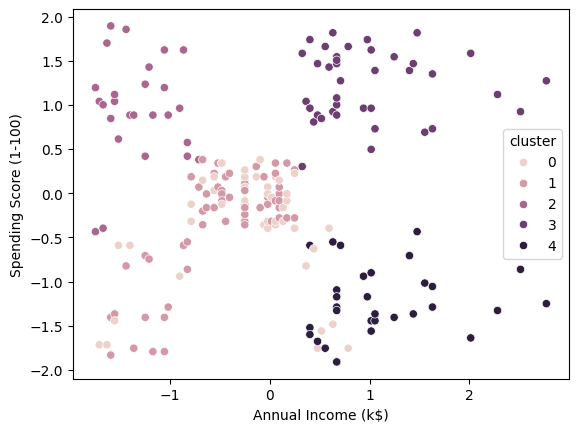

In [87]:
# 2D scatterplot for spending score vs annual income and which cluster it belongs to
df['cluster'] = y_pred
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['cluster'])

In [88]:
# 3D scatterplot for Age vs spending score vs annual income and which cluster it belongs to
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=y_pred)
fig.show()

In [89]:
# Checking silhouette_score
from sklearn.metrics import silhouette_score
silhouette_score(df, y_pred)

np.float64(0.5479768365419259)

### Applying DBSCAN  (Not Optimal for given dataset)

In [98]:
# Applying DBSCAN and checking silhoutte_score
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
y_pred = dbscan.fit_predict(df)
silhouette_score(df, y_pred)

np.float64(0.2983575622952367)

### Applying hierachical clustering (Optimal for given dataset)

In [99]:
# Applying Agglomerative Clustering and checking silhoutte_score
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5)
y_pred = agg.fit_predict(df)
silhouette_score(df, y_pred)

np.float64(0.5337743339102339)

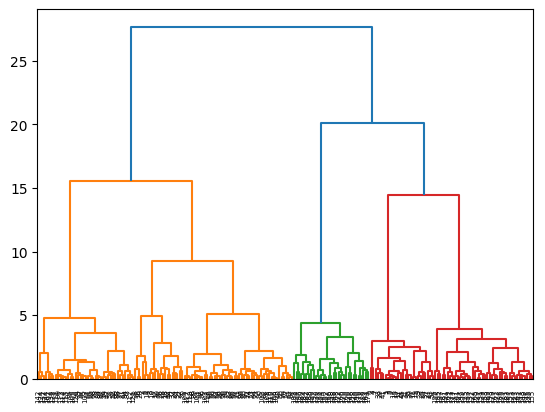

In [100]:
# Plotting dendogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df, method='ward'))
plt.show()